In [1]:
%matplotlib inline
import xarray as xr

In [2]:
def vertical_average(y, w):
    return (y*w).sum('z')/w.sum('z')

In this notebook, I explore the effect that enforcing positive precipitation has on the errors, as well as the precipitation field

# Error of positive precip

In [3]:
import os

field = "qt"
pos_prec_path = "../data/output/model.pos-prec/0/2/"


errs = xr.open_dataset(os.path.join(pos_prec_path, "error.nc"))


comparison_error_path = "../data/output/model.VaryT-20/0/2/error.nc"

comparison_error = xr.open_dataset(comparison_error_path)

err1_vert_avg = vertical_average(comparison_error[field], comparison_error.w)
err2_vert_avg = vertical_average(errs[field], errs.w).isel(y=slice(4,-4))

In [4]:
err1_vert_avg

<xarray.DataArray (y: 16)>
array([ 0.406829,  0.299325,  0.278112,  0.285911,  0.28142 ,  0.264472,
        0.237086,  0.224537,  0.228592,  0.239711,  0.252178,  0.26148 ,
        0.260498,  0.282947,  0.297503,  0.401681])
Coordinates:
  * y        (y) float32 3.918e+06 4.078e+06 4.238e+06 4.398e+06 4.558e+06 ...

/Users/noah/anaconda/envs/uw-machine-learning/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


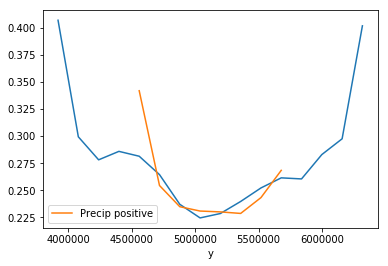

In [5]:
err1_vert_avg.plot()
err2_vert_avg.plot(label="Precip positive")
plt.legend()

The positive precip scheme diverges away from the the equator, but seems to have pretty low error in the center of the domain. Maybe more training epochs would improve this.

# What do the columns look like

(100, 130)

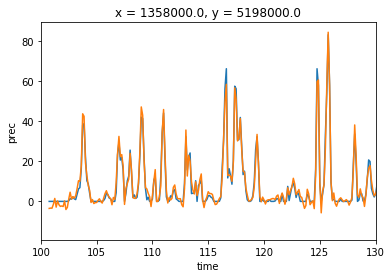

In [6]:
cols = xr.open_dataset(os.path.join(pos_prec_path, "columns.nc"))
loc = cols.isel(x=8, y=8)
no_pos_prec = xr.open_dataset( "../data/output/model.VaryT-20/0/2/columns.nc").isel(x=8, y=8)

loc.prec.plot()
no_pos_prec.prec.plot()
plt.xlim([100, 130])

We can see that indeed P > 0 for the positive precipitation run.

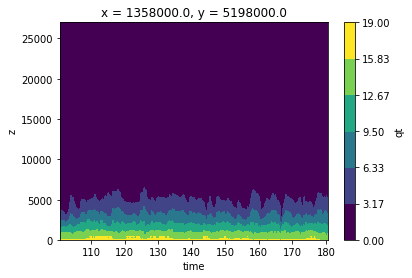

In [7]:
loc.qt.plot.contourf(x="time", y="z", cmap='viridis', vmin=0, vmax=19)

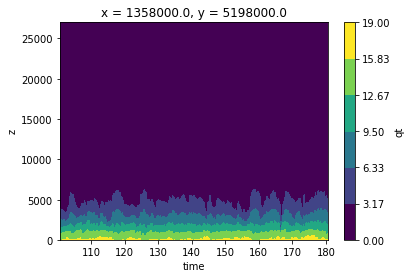

In [8]:
truth = xr.open_dataset("../data/processed/inputs.nc").isel(x=8, y=8)

truth.qt.plot.contourf(x="time", y="z", cmap='viridis', vmin=0, vmax=19)

The humidity profiles look pretty good too.